In [19]:
import pandas as pd
data=pd.read_csv(r"C:\Users\sumey\Downloads\data.csv")

In [20]:
data.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [40]:
print(data.shape)
# Check for null values in each column
null_values = data.isnull().sum()

# Print the number of null values for each column
print("Null values in each column:")
print(null_values)


(569, 33)
Null values in each column:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
principal_geom_feature     0
dtype

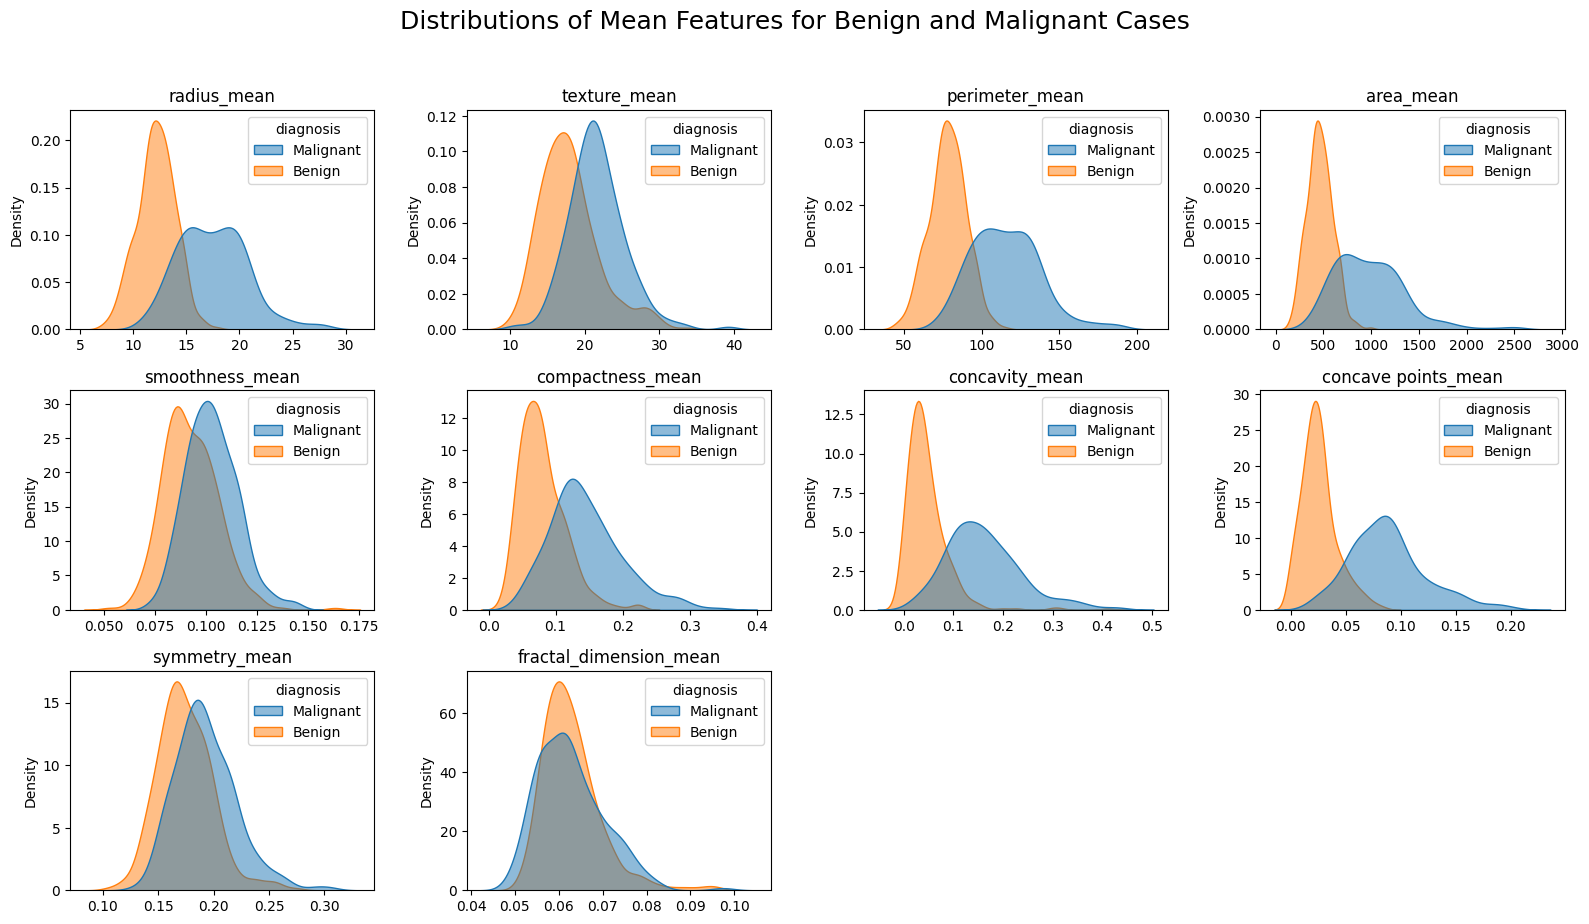

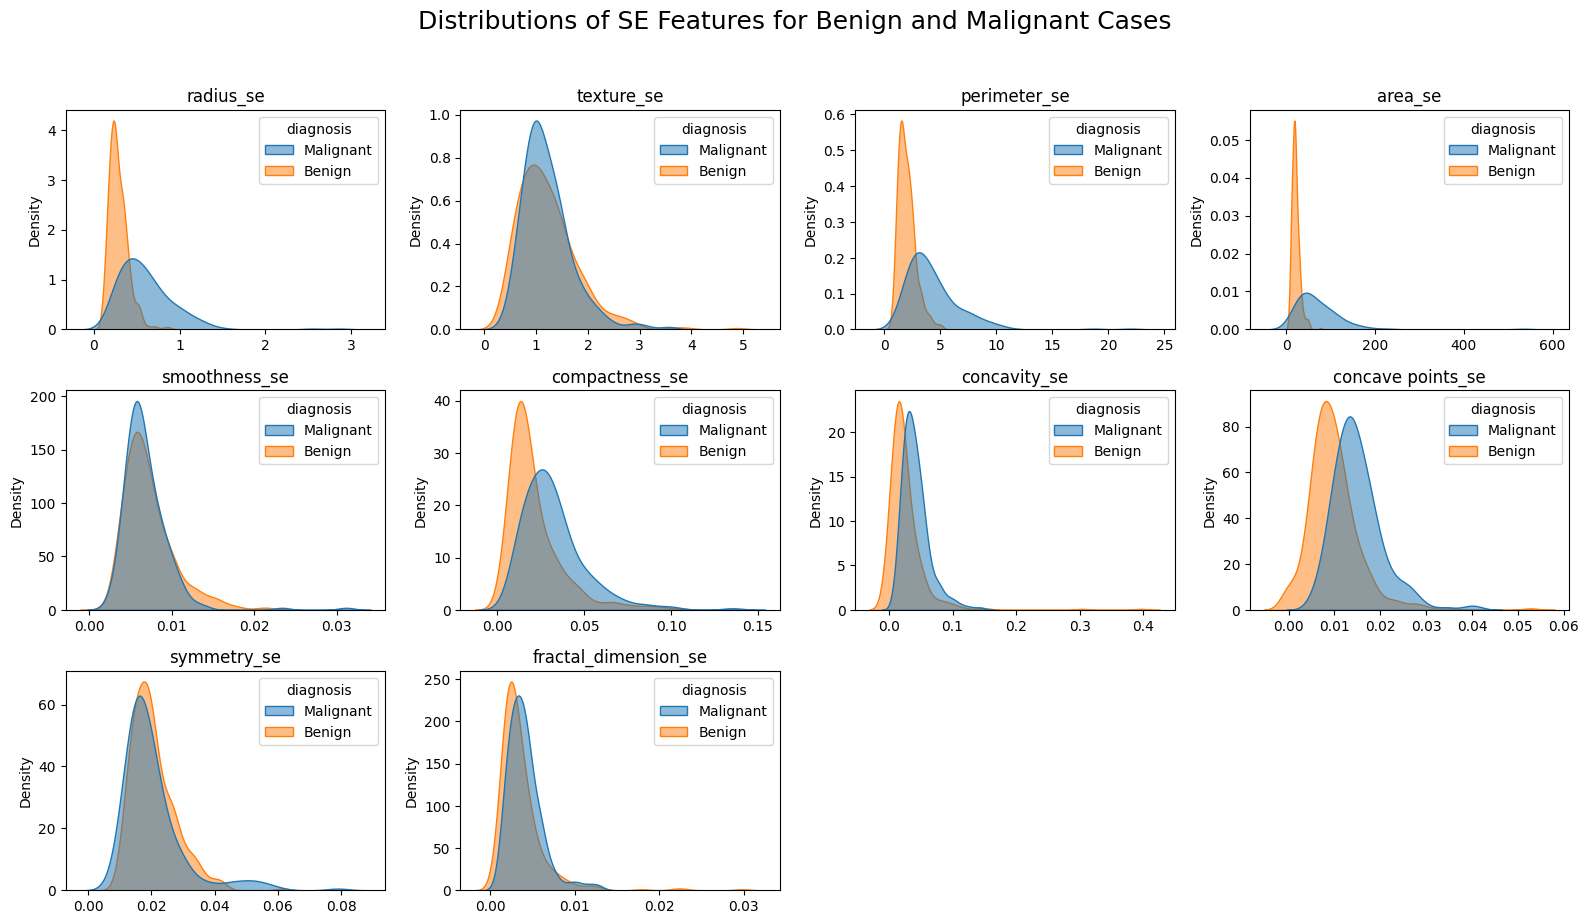

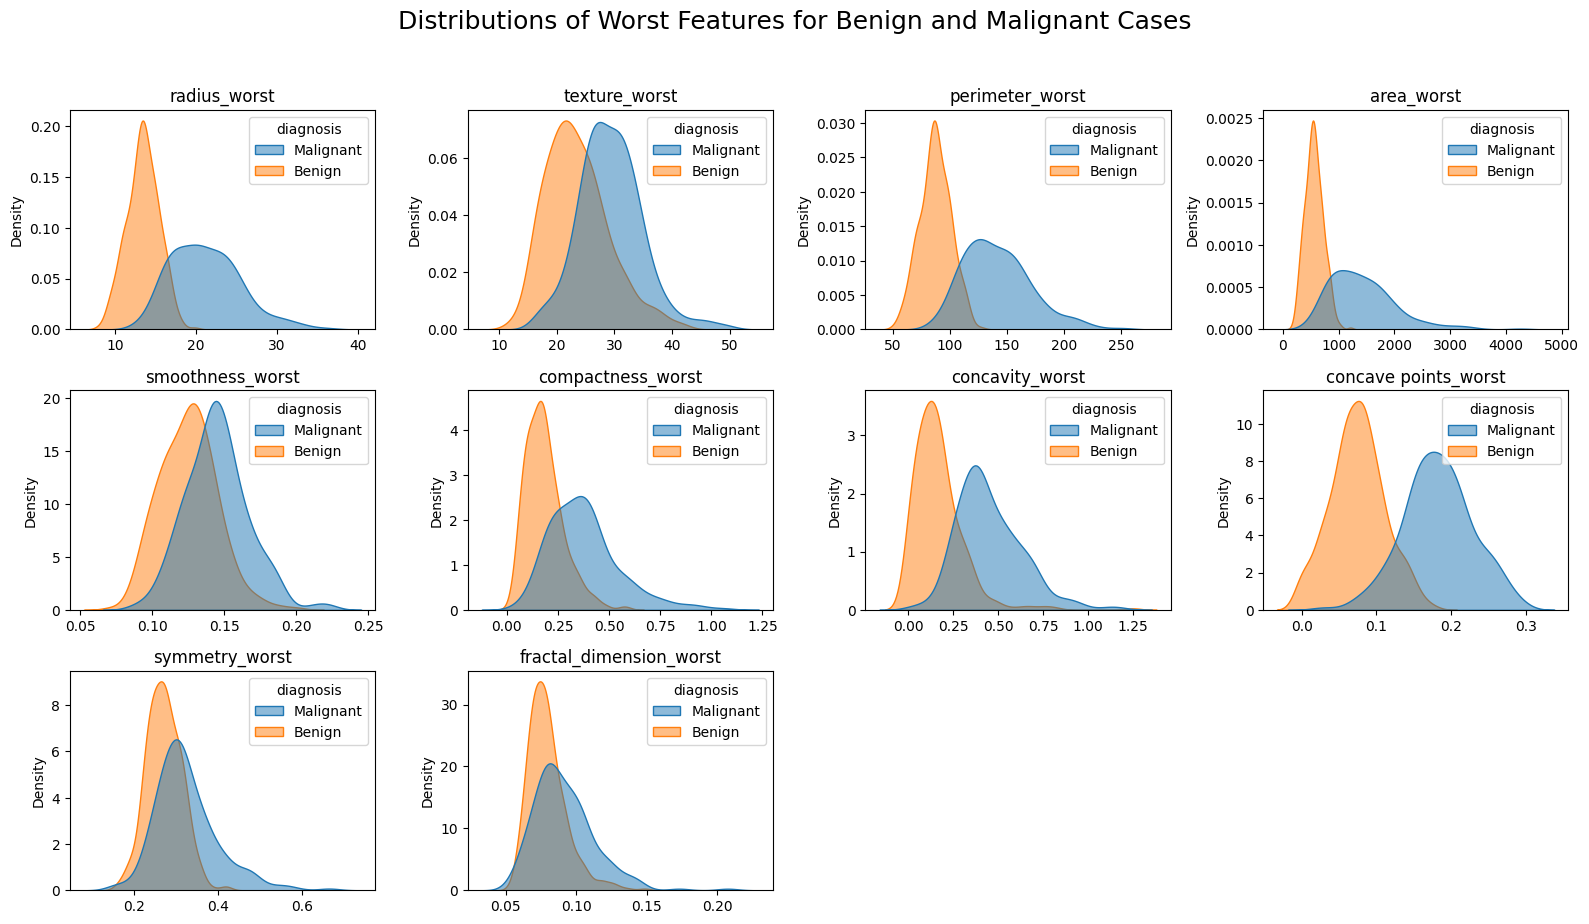

In [22]:
import seaborn as sns
import matplotlib as mlt
import matplotlib.pyplot as plt

# Map diagnosis to a binary format for better visualization
data['diagnosis'] = data['diagnosis'].map({'M': 'Malignant', 'B': 'Benign'})

# Define feature groups
mean_features = [col for col in data.columns if 'mean' in col]
se_features = [col for col in data.columns if 'se' in col]
worst_features = [col for col in data.columns if 'worst' in col]

# Function to plot distributions
def plot_feature_distributions(features, title):
    plt.figure(figsize=(16, 12))
    for i, feature in enumerate(features):
        plt.subplot(4, 4, i + 1)
        sns.kdeplot(data=data, x=feature, hue='diagnosis', fill=True, common_norm=False, alpha=0.5)
        plt.title(feature)
        plt.xlabel('')
    plt.suptitle(title, fontsize=18)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Plot mean features
plot_feature_distributions(mean_features, "Distributions of Mean Features for Benign and Malignant Cases")

# Plot SE features
plot_feature_distributions(se_features, "Distributions of SE Features for Benign and Malignant Cases")

# Plot worst features
plot_feature_distributions(worst_features, "Distributions of Worst Features for Benign and Malignant Cases")

radius_mean       0.730029
perimeter_mean    0.742636
area_mean         0.708984
dtype: float64


C:\Users\sumey\AppData\Local\Temp\ipykernel_36688\995528782.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['diagnosis_numeric'] = data['diagnosis'].replace({'Malignant': 1, 'Benign': 0})


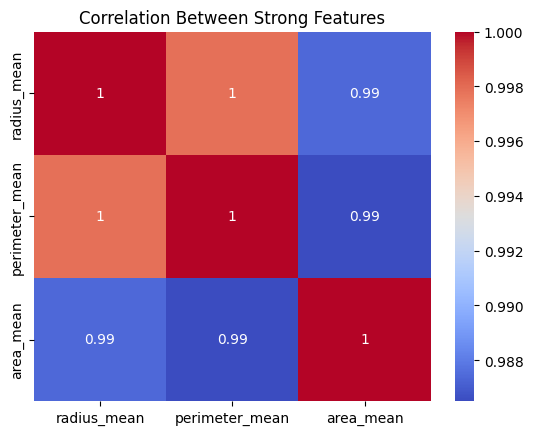

In [23]:
# Convert 'diagnosis' to numeric
data['diagnosis_numeric'] = data['diagnosis'].replace({'Malignant': 1, 'Benign': 0})

# Features to analyze
features = ['radius_mean', 'perimeter_mean', 'area_mean']

# Compute correlations
correlation = data[features].apply(lambda col: col.corr(data['diagnosis_numeric']))
print(correlation)

# Visualize correlation matrix for the features
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data[features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Strong Features")
plt.show()

#### as we see that those 3 feautures have so much similarity we do PCA (principal component analysis) to combine them into a single principal component by finding linear combination of the original feature bbut first we normalize them so that the radius_mean dont affect the PCA.it explain the largest possible variance in the data,making it compact representation of the original features 

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Select highly correlated features
correlated_features = ['radius_mean', 'perimeter_mean', 'area_mean']

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[correlated_features])

# Apply PCA
pca = PCA(n_components=1)  # Reduce to 1 principal component
principal_component = pca.fit_transform(scaled_data)

# Add the principal component to the dataset
data['principal_geom_feature'] = principal_component



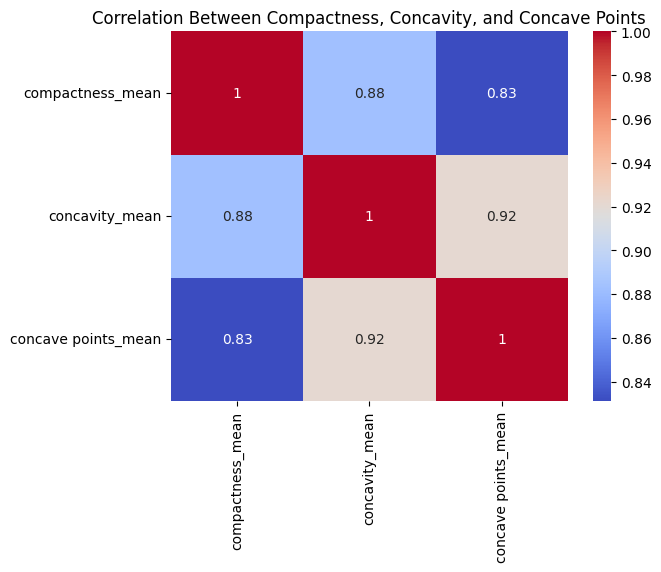

In [25]:


# Features to check
correlated_features = ['compactness_mean', 'concavity_mean', 'concave points_mean']

# Heatmap to visualize correlation
corr_matrix = data[correlated_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Between Compactness, Concavity, and Concave Points")
plt.show()


C:\Users\sumey\AppData\Local\Temp\ipykernel_36688\4050454148.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['diagnosis'] = data['diagnosis'].replace({'Benign': 0, 'Malignant': 1})


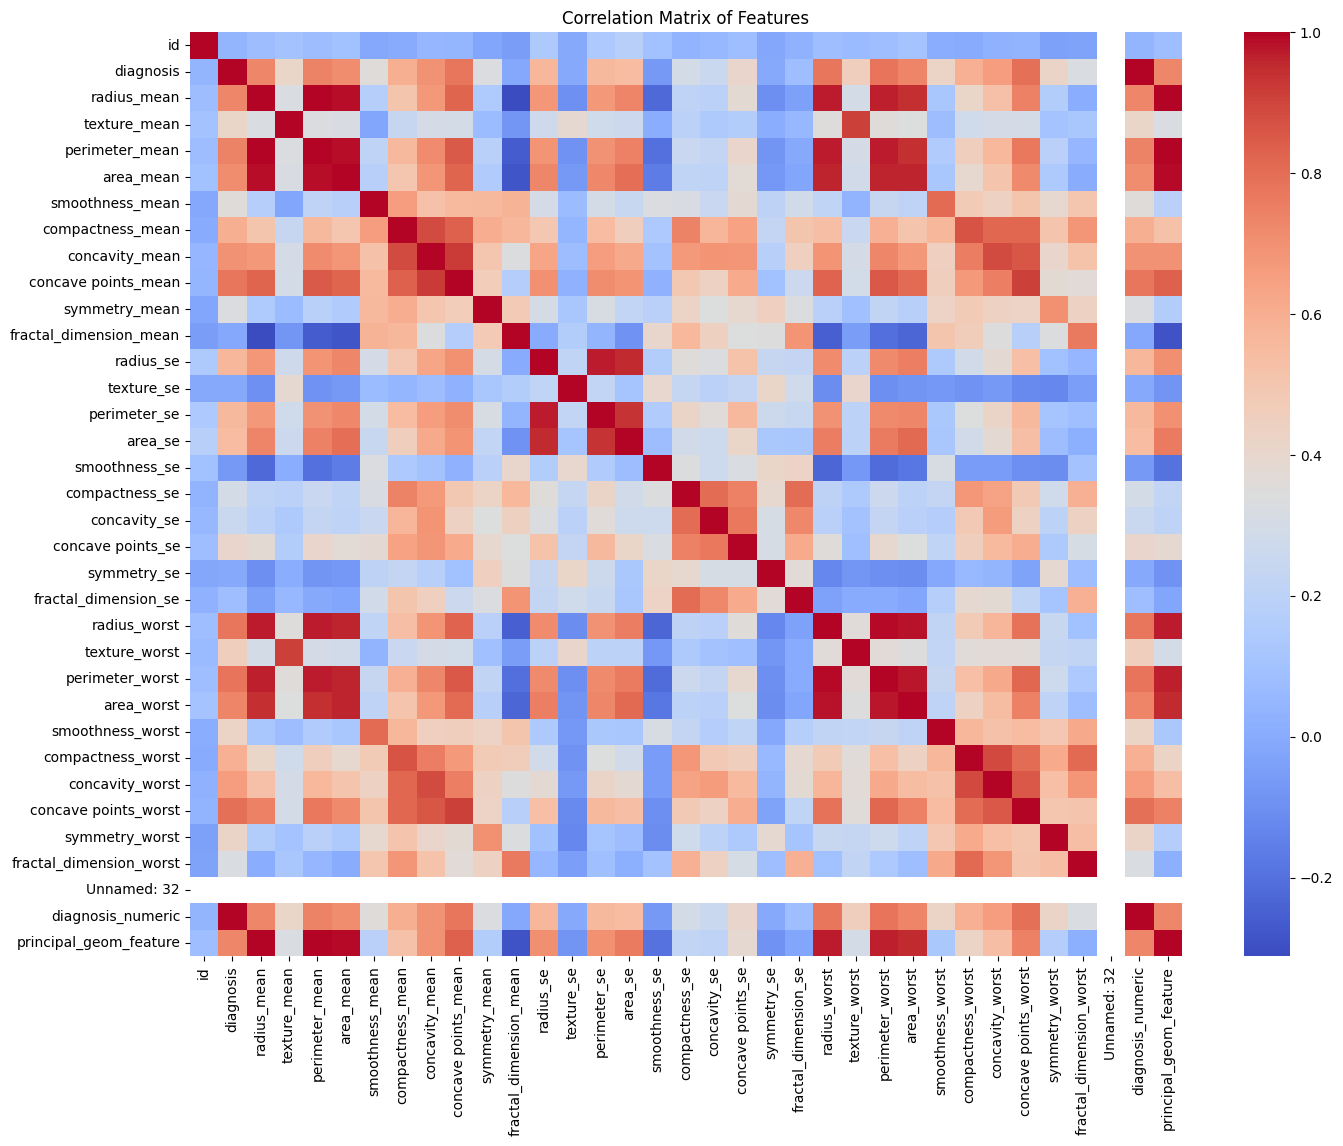

diagnosis                  1.000000
diagnosis_numeric          1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
principal_geom_feature     0.729532
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

data['diagnosis'] = data['diagnosis'].replace({'Benign': 0, 'Malignant': 1})

# Compute correlation matrix for all features including the principal_geom_feature
correlation_matrix = data.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", cbar=True, fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

# Extract correlations with 'diagnosis' and sort them
diagnosis_corr = correlation_matrix["diagnosis"].sort_values(ascending=False)
print(diagnosis_corr)


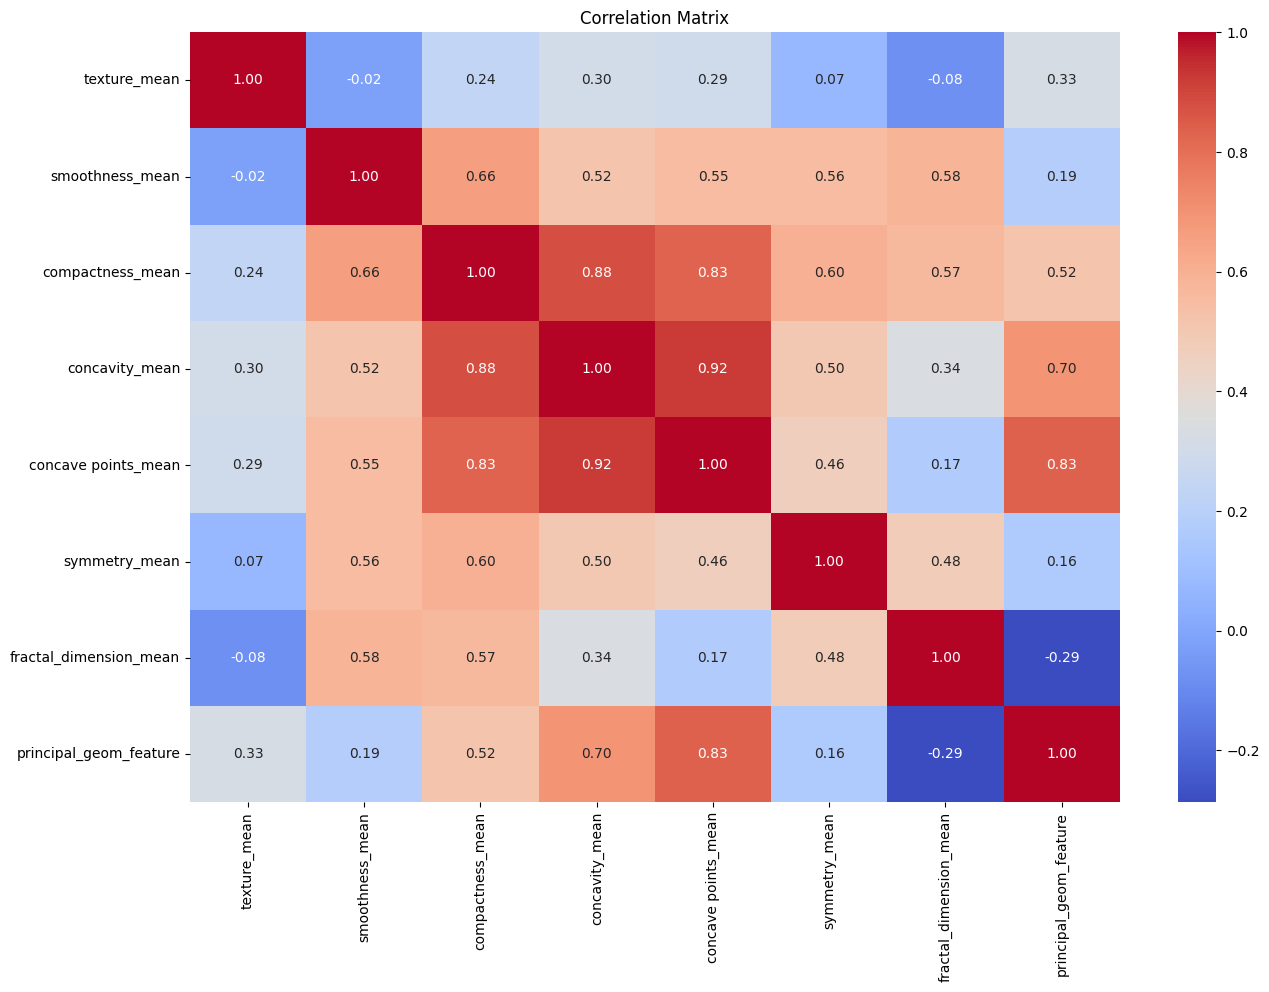

In [27]:
# List of features for correlation
features = [
    'texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 
    'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'principal_geom_feature' 
  
]
#  'texture_se', 'smoothness_se', 'compactness_se', 
    #'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 
  #  'texture_worst',  'smoothness_worst', 
    #'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 
   # 'fractal_dimension_worst', 'principal_geom_feature'

# Calculate correlation matrix
correlation_matrix = data[features].corr()

# Display the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


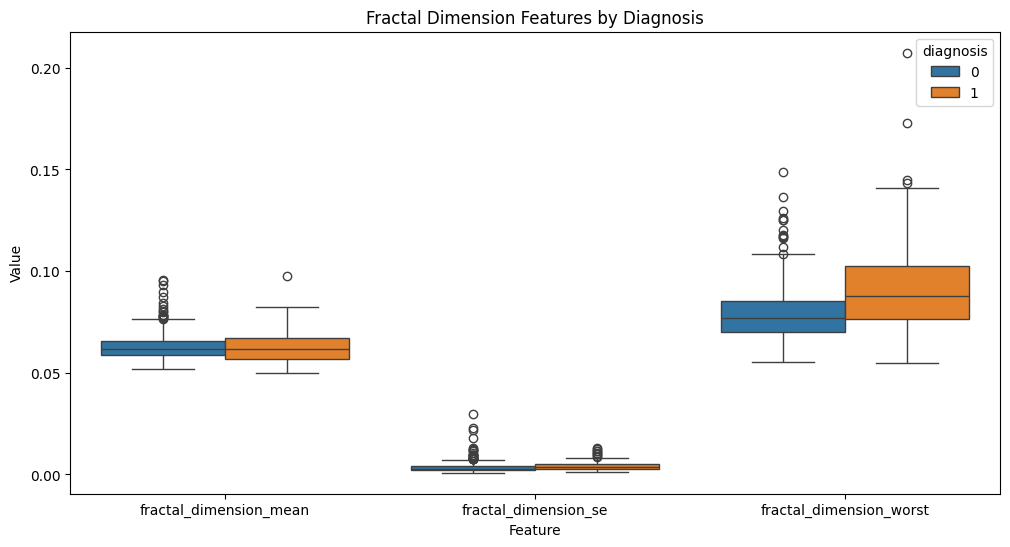

Correlation with Diagnosis:
 fractal_dimension_mean    -0.012838
fractal_dimension_se       0.077972
fractal_dimension_worst    0.323872
dtype: float64


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for fractal dimension features
fractal_features = ['fractal_dimension_mean', 'fractal_dimension_se', 'fractal_dimension_worst']
data_melted = data.melt(id_vars=['diagnosis'], value_vars=fractal_features, 
                        var_name='Feature', value_name='Value')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Feature', y='Value', hue='diagnosis', data=data_melted)
plt.title('Fractal Dimension Features by Diagnosis')
plt.show()

# Correlation of fractal dimension features with diagnosis
diagnosis_map = data['diagnosis'].replace({'M': 1, 'B': 0})
correlation = data[fractal_features].apply(lambda col: col.corr(diagnosis_map))
print("Correlation with Diagnosis:\n", correlation)


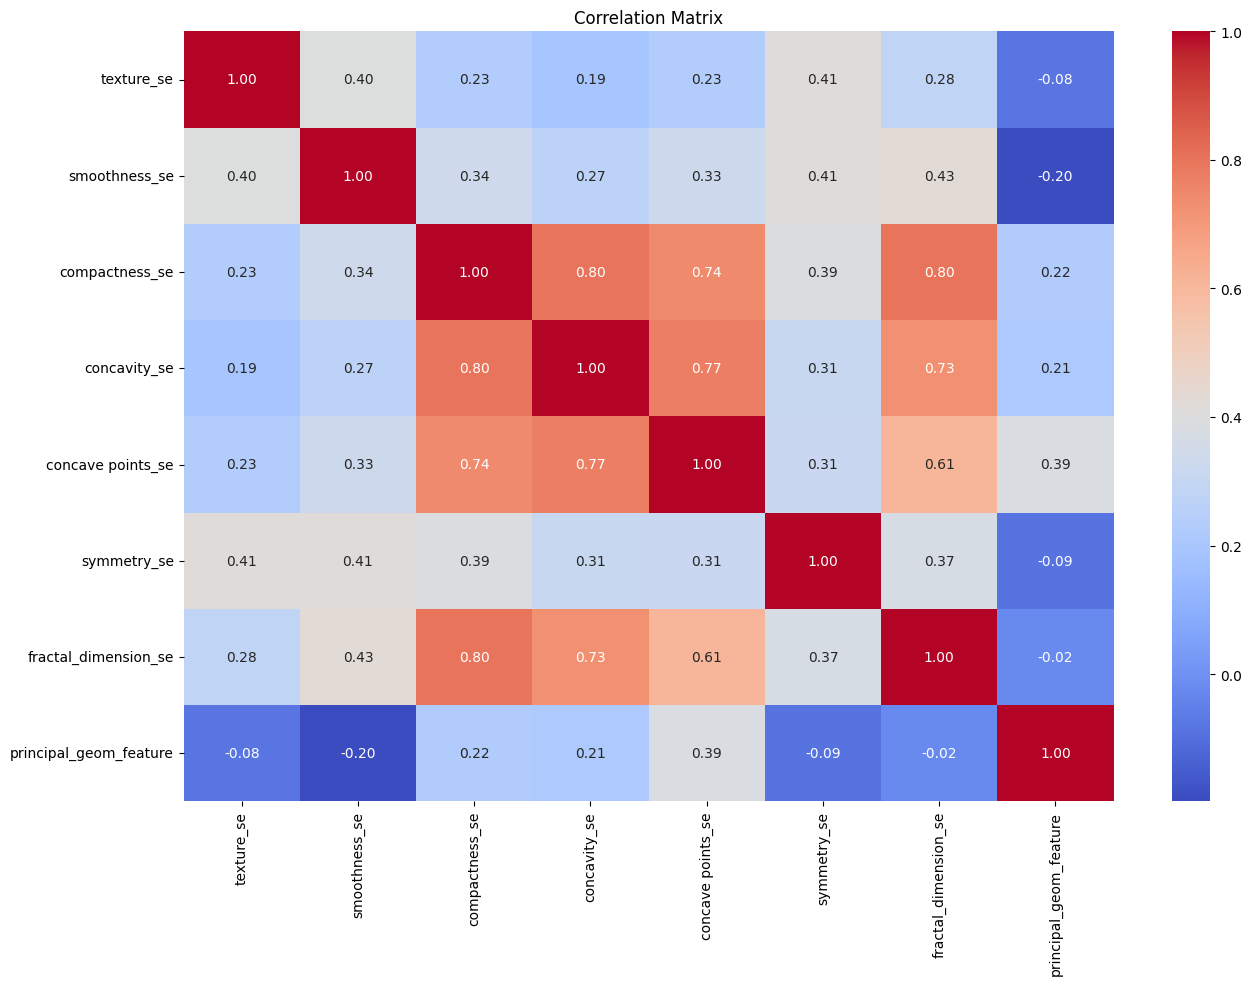

In [29]:
features1 = [
    'texture_se', 'smoothness_se', 'compactness_se', 'concavity_se', 
    'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'principal_geom_feature' 
  
]
correlation_matrix = data[features1].corr()


plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [30]:
# Drop 'Unnamed: 32' and 'diagnosis_numeric' columns from the dataset
data = data.drop(['Unnamed: 32', 'diagnosis_numeric'], axis=1)
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,principal_geom_feature
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1.935181
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,3.131620
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,2.716609
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,-1.227375
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.090517


In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Converting 'diagnosis' to binary (1 for 'M', 0 for 'B')
#data['diagnosis'] = [1 if each == "M" else 0 for each in data.diagnosis]

# Split the data into X and y
X = data.drop(["diagnosis"], axis=1)
y = data.diagnosis.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data (mean=0, std=1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)  # Notice that we use transform here, not fit_transform


In [32]:
print(X_train)

[[-0.23712699 -1.44075296 -0.43531947 ...  2.09724217  1.88645014
  -1.31819934]
 [-0.23702031  1.97409619  1.73302577 ...  1.89116053  2.49783848
   1.97893157]
 [-0.23712907 -1.39998202 -1.24962228 ...  0.59760192  0.0578942
  -1.2890995 ]
 ...
 [-0.17630431  0.04880192 -0.55500086 ... -0.70863864 -1.27145475
  -0.02598275]
 [-0.23675669 -0.03896885  0.10207345 ...  0.43432185  1.21336207
  -0.07536522]
 [-0.2371006  -0.54860557  0.31327591 ... -0.3345212  -0.84628745
  -0.56983876]]


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation accuracy: 0.9758
Test set accuracy: 0.9825


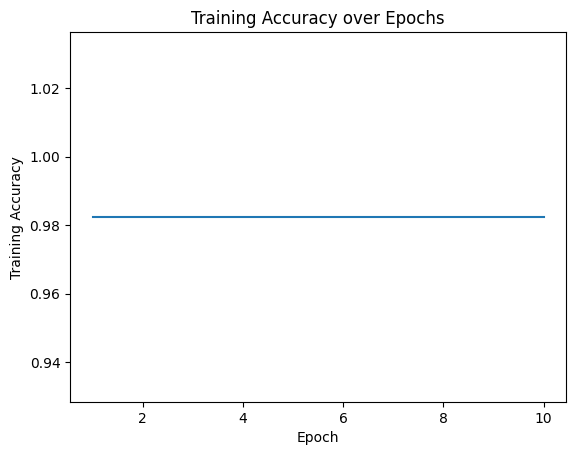

In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Initialize the SVM model
svm = SVC()

# Hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_svm = grid_search.best_estimator_

# Print the best parameters and the accuracy
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Evaluate the model on the test set
y_pred = best_svm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {test_accuracy:.4f}")

# Plot the training progress
epochs = 10
train_accuracies = []
for epoch in range(epochs):
    best_svm.fit(X_train, y_train)  # Train for 1 epoch
    y_train_pred = best_svm.predict(X_train)
    accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(accuracy)

# Visualize the accuracy during the epochs
plt.plot(range(1, epochs + 1), train_accuracies)
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.show()


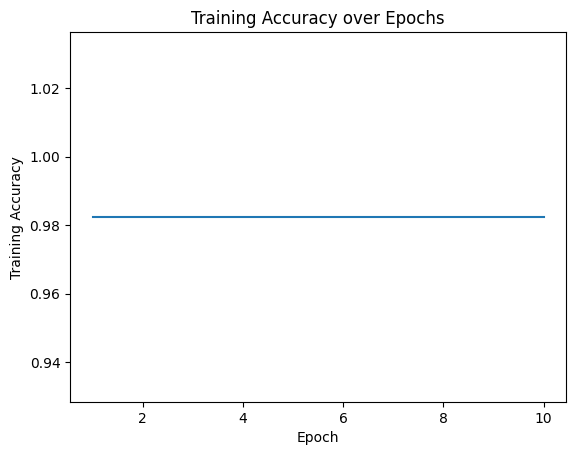

In [34]:
# Plot the training progress over 10 "epochs"
epochs = 10
train_accuracies = []

# Train the model for each epoch
for epoch in range(epochs):
    best_svm.fit(X_train, y_train)  # Train for 1 epoch
    y_train_pred = best_svm.predict(X_train)
    accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(accuracy)

# Visualize the accuracy during the epochs
plt.plot(range(1, epochs + 1), train_accuracies)
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.show()


Epoch 1/15 - Train Accuracy: 0.9736 | Test Accuracy: 0.9825
Epoch 2/15 - Train Accuracy: 0.9824 | Test Accuracy: 0.9825
Epoch 3/15 - Train Accuracy: 0.9780 | Test Accuracy: 0.9825
Epoch 4/15 - Train Accuracy: 0.9824 | Test Accuracy: 0.9737
Epoch 5/15 - Train Accuracy: 0.9824 | Test Accuracy: 0.9912
Epoch 6/15 - Train Accuracy: 0.9824 | Test Accuracy: 0.9825
Epoch 7/15 - Train Accuracy: 0.9846 | Test Accuracy: 0.9912
Epoch 8/15 - Train Accuracy: 0.9824 | Test Accuracy: 0.9825
Epoch 9/15 - Train Accuracy: 0.9824 | Test Accuracy: 0.9912
Epoch 10/15 - Train Accuracy: 0.9846 | Test Accuracy: 0.9825
Epoch 11/15 - Train Accuracy: 0.9846 | Test Accuracy: 0.9825
Epoch 12/15 - Train Accuracy: 0.9846 | Test Accuracy: 0.9912
Epoch 13/15 - Train Accuracy: 0.9846 | Test Accuracy: 0.9912
Epoch 14/15 - Train Accuracy: 0.9846 | Test Accuracy: 0.9912
Epoch 15/15 - Train Accuracy: 0.9868 | Test Accuracy: 0.9912


c:\Users\sumey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\sumey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\sumey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\sumey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consid

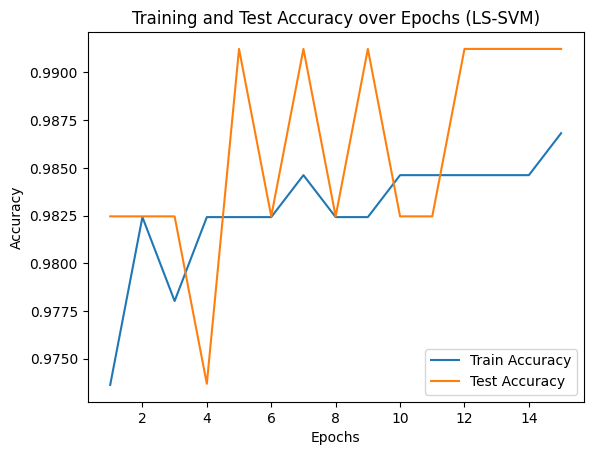

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Confusion Matrix:
[[71  0]
 [ 1 42]]


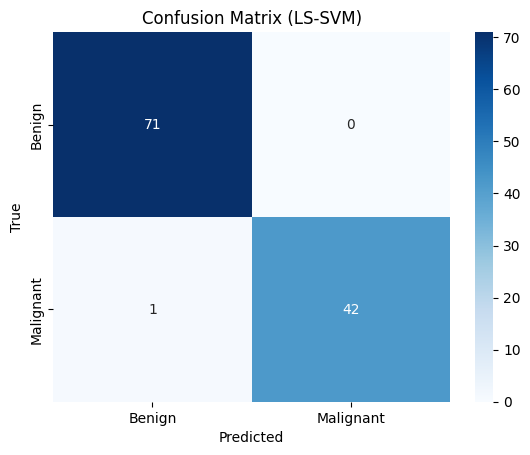

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
import seaborn as sns



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for LS-SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Set hyperparameters for LS-SVM-like model with SGD optimization
epochs = 15
learning_rate = 0.01

# LS-SVM model using SGDClassifier with hinge loss
ls_svm = SGDClassifier(loss='hinge', max_iter=1, warm_start=True, learning_rate='constant', eta0=learning_rate)

# Arrays to store accuracy over epochs
train_accuracies = []
test_accuracies = []

# Epoch loop to simulate iterative training
for epoch in range(epochs):
    # Train for 1 epoch
    ls_svm.fit(X_train, y_train)
    
    # Predictions and accuracy on train and test sets
    y_train_pred = ls_svm.predict(X_train)
    y_test_pred = ls_svm.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Store the accuracies for plotting
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
    # Print epoch-wise training and testing accuracy
    print(f"Epoch {epoch+1}/{epochs} - Train Accuracy: {train_accuracy:.4f} | Test Accuracy: {test_accuracy:.4f}")

# Plot the training and testing accuracy over epochs
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy over Epochs (LS-SVM)')
plt.legend()
plt.show()

# Evaluate the final model performance on the test set
y_pred = ls_svm.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualize the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (LS-SVM)')
plt.show()


c:\Users\sumey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\sumey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\sumey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\sumey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization

Epoch 1/80 - Training Accuracy: 0.8220
Epoch 2/80 - Training Accuracy: 0.8901
Epoch 3/80 - Training Accuracy: 0.9165
Epoch 4/80 - Training Accuracy: 0.9319
Epoch 5/80 - Training Accuracy: 0.9385
Epoch 6/80 - Training Accuracy: 0.9451
Epoch 7/80 - Training Accuracy: 0.9473
Epoch 8/80 - Training Accuracy: 0.9473
Epoch 9/80 - Training Accuracy: 0.9582
Epoch 10/80 - Training Accuracy: 0.9582
Epoch 11/80 - Training Accuracy: 0.9582
Epoch 12/80 - Training Accuracy: 0.9648
Epoch 13/80 - Training Accuracy: 0.9692
Epoch 14/80 - Training Accuracy: 0.9692
Epoch 15/80 - Training Accuracy: 0.9736
Epoch 16/80 - Training Accuracy: 0.9802
Epoch 17/80 - Training Accuracy: 0.9802
Epoch 18/80 - Training Accuracy: 0.9846
Epoch 19/80 - Training Accuracy: 0.9846
Epoch 20/80 - Training Accuracy: 0.9868
Epoch 21/80 - Training Accuracy: 0.9890
Epoch 22/80 - Training Accuracy: 0.9890
Epoch 23/80 - Training Accuracy: 0.9890
Epoch 24/80 - Training Accuracy: 0.9890
Epoch 25/80 - Training Accuracy: 0.9890
Epoch 26/

c:\Users\sumey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\sumey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\sumey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\sumey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization

Epoch 27/80 - Training Accuracy: 0.9890
Epoch 28/80 - Training Accuracy: 0.9890
Epoch 29/80 - Training Accuracy: 0.9890
Epoch 30/80 - Training Accuracy: 0.9912
Epoch 31/80 - Training Accuracy: 0.9912
Epoch 32/80 - Training Accuracy: 0.9912
Epoch 33/80 - Training Accuracy: 0.9912
Epoch 34/80 - Training Accuracy: 0.9912
Epoch 35/80 - Training Accuracy: 0.9912
Epoch 36/80 - Training Accuracy: 0.9912
Epoch 37/80 - Training Accuracy: 0.9912
Epoch 38/80 - Training Accuracy: 0.9912
Epoch 39/80 - Training Accuracy: 0.9912
Epoch 40/80 - Training Accuracy: 0.9912
Epoch 41/80 - Training Accuracy: 0.9912
Epoch 42/80 - Training Accuracy: 0.9912
Epoch 43/80 - Training Accuracy: 0.9912
Epoch 44/80 - Training Accuracy: 0.9912
Epoch 45/80 - Training Accuracy: 0.9912
Epoch 46/80 - Training Accuracy: 0.9934
Epoch 47/80 - Training Accuracy: 0.9934
Epoch 48/80 - Training Accuracy: 0.9934


c:\Users\sumey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\sumey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\sumey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\sumey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization

Epoch 49/80 - Training Accuracy: 0.9934
Epoch 50/80 - Training Accuracy: 0.9934
Epoch 51/80 - Training Accuracy: 0.9934
Epoch 52/80 - Training Accuracy: 0.9934
Epoch 53/80 - Training Accuracy: 0.9934
Epoch 54/80 - Training Accuracy: 0.9934
Epoch 55/80 - Training Accuracy: 0.9934
Epoch 56/80 - Training Accuracy: 0.9934
Epoch 57/80 - Training Accuracy: 0.9934
Epoch 58/80 - Training Accuracy: 0.9934
Epoch 59/80 - Training Accuracy: 0.9934
Epoch 60/80 - Training Accuracy: 0.9956
Epoch 61/80 - Training Accuracy: 0.9956
Epoch 62/80 - Training Accuracy: 0.9956
Epoch 63/80 - Training Accuracy: 0.9956
Epoch 64/80 - Training Accuracy: 0.9956
Epoch 65/80 - Training Accuracy: 0.9956
Epoch 66/80 - Training Accuracy: 0.9956
Epoch 67/80 - Training Accuracy: 0.9956
Epoch 68/80 - Training Accuracy: 0.9956
Epoch 69/80 - Training Accuracy: 0.9956


c:\Users\sumey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\sumey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\sumey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\sumey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization

Epoch 70/80 - Training Accuracy: 0.9978
Epoch 71/80 - Training Accuracy: 0.9978
Epoch 72/80 - Training Accuracy: 0.9978
Epoch 73/80 - Training Accuracy: 0.9978
Epoch 74/80 - Training Accuracy: 0.9978
Epoch 75/80 - Training Accuracy: 0.9978
Epoch 76/80 - Training Accuracy: 0.9978
Epoch 77/80 - Training Accuracy: 0.9978
Epoch 78/80 - Training Accuracy: 0.9978
Epoch 79/80 - Training Accuracy: 0.9978
Epoch 80/80 - Training Accuracy: 0.9978


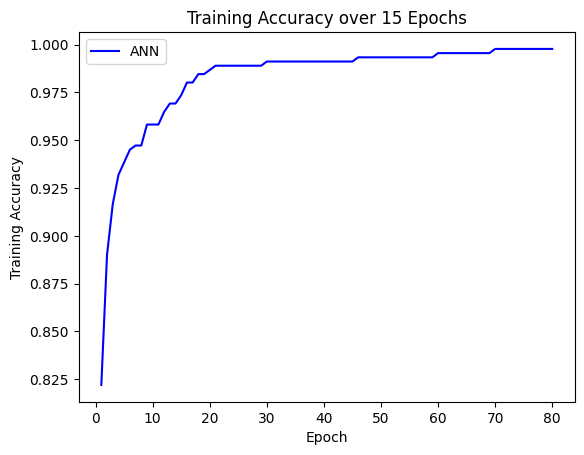

ANN Test set accuracy: 0.9649


In [36]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Initialize the ANN model with optimizer and activation functions
ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1, solver='adam', activation='relu', random_state=42, warm_start=True)


# Train the ANN model for 15 epochs
epochs = 80
train_accuracies_ann = []

# Train the ANN and print the epoch-wise training accuracy
for epoch in range(epochs):
    ann.fit(X_train, y_train)  # Train for 1 epoch at a time
    y_train_pred_ann = ann.predict(X_train)
    accuracy = accuracy_score(y_train, y_train_pred_ann)
    train_accuracies_ann.append(accuracy)
    print(f"Epoch {epoch+1}/{epochs} - Training Accuracy: {accuracy:.4f}")

# Plot the training accuracy over epochs
plt.plot(range(1, epochs + 1), train_accuracies_ann, label="ANN", color='b')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy over 15 Epochs')
plt.legend()
plt.show()

# Test set accuracy
y_pred_ann = ann.predict(X_test)
ann_accuracy = accuracy_score(y_test, y_pred_ann)
print(f"ANN Test set accuracy: {ann_accuracy:.4f}")




In [44]:
from sklearn.metrics import precision_score, f1_score, accuracy_score, classification_report
import pandas as pd

# Get predictions for each model
y_pred_svm = best_svm.predict(X_test)  # Best SVM model from your grid search
y_pred_ls_svm = ls_svm.predict(X_test)  # LS-SVM model from the SGDClassifier
y_pred_ann = ann.predict(X_test)  # ANN model predictions

# Calculate accuracy, precision, and F1 score for each model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

accuracy_ls_svm = accuracy_score(y_test, y_pred_ls_svm)
precision_ls_svm = precision_score(y_test, y_pred_ls_svm)
f1_ls_svm = f1_score(y_test, y_pred_ls_svm)

accuracy_ann = accuracy_score(y_test, y_pred_ann)
precision_ann = precision_score(y_test, y_pred_ann)
f1_ann = f1_score(y_test, y_pred_ann)

# Create a DataFrame to compare the models
comparison_df = pd.DataFrame({
    'Model': ['SVM', 'LS-SVM', 'ANN'],
    'Accuracy': [accuracy_svm, accuracy_ls_svm, accuracy_ann],
    'Precision': [precision_svm, precision_ls_svm, precision_ann],
    'F1 Score': [f1_svm, f1_ls_svm, f1_ann]
})

# Print the comparison
print(comparison_df)

# Optional: Print detailed classification reports
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("\nLS-SVM Classification Report:")
print(classification_report(y_test, y_pred_ls_svm))

print("\nANN Classification Report:")
print(classification_report(y_test, y_pred_ann))





    Model  Accuracy  Precision  F1 Score
0     SVM  0.982456   1.000000  0.976190
1  LS-SVM  0.991228   1.000000  0.988235
2     ANN  0.964912   0.953488  0.953488

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


LS-SVM Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114


ANN Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0

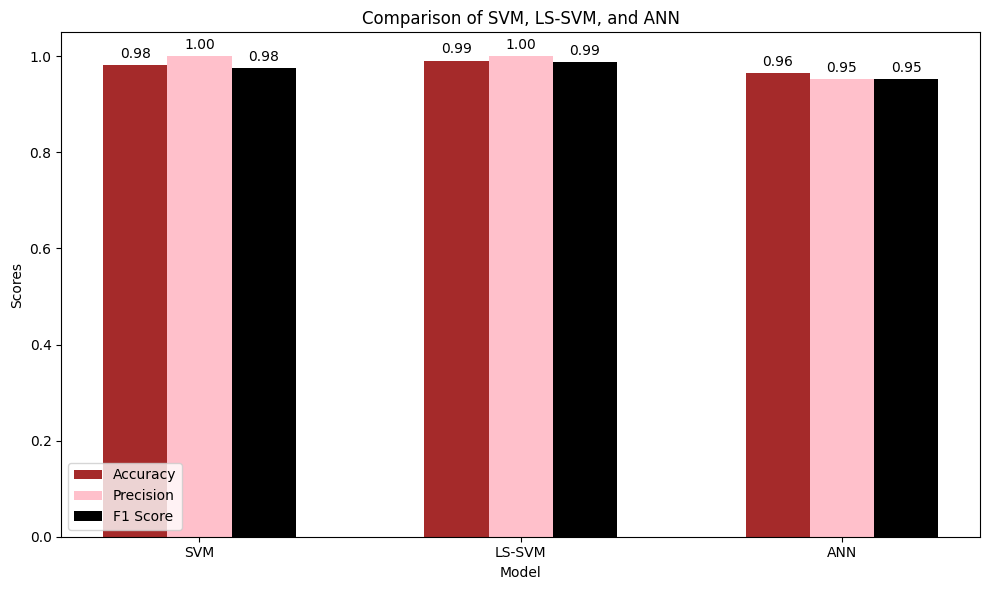

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import numpy as np

# Data for the models and metrics
models = ['SVM', 'LS-SVM', 'ANN']
accuracy = [accuracy_svm, accuracy_ls_svm, accuracy_ann]
precision = [precision_svm, precision_ls_svm, precision_ann]
f1_score = [f1_svm, f1_ls_svm, f1_ann]

# Create an array for the x-axis
x = np.arange(len(models))

# Set the width of the bars
width = 0.2

# Plotting the metrics as grouped bar charts
fig, ax = plt.subplots(figsize=(10, 6))

# Accuracy bar plot
rects1 = ax.bar(x - width, accuracy, width, label='Accuracy', color='brown')

# Precision bar plot
rects2 = ax.bar(x, precision, width, label='Precision', color='pink')

# F1 Score bar plot
rects3 = ax.bar(x + width, f1_score, width, label='F1 Score', color='black')

# Adding labels, title, and custom x-axis tick labels
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Comparison of SVM, LS-SVM, and ANN')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Display values on top of the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

# Show the plot
plt.tight_layout()
plt.show()
